In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

os.listdir('../../data/final/')

['carspeed.csv',
 'car_ej.csv',
 'car_sm.csv',
 'real_final.csv',
 'test.csv',
 'train.csv']

In [2]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
train = pd.read_csv('../../data/final/train.csv')
test = pd.read_csv('../../data/final/test.csv')

In [4]:
pd.set_option('display.max_columns', 500)
round(train.describe(), 3)

,date,link_id,road_length,road_num,holiday,special,vacation,time,inter_num,d1,d2,d3,d4,victims,severity,accident_count,temperature,wind,rain,snow,cctv,kids,speed_limit,entrance,signal,SO2,CO,O3,NO2,PM10,PM2.5,month,weekend,y
count,1.042732e+06,1.042732e+06,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000,1042732.000
mean,2.018067e+07,1.219876e+09,676.778,3.368,0.061,0.033,0.055,16.494,12.516,1.169,52.376,190.933,21.966,266.444,765.917,174.245,15.266,1.831,0.157,0.040,1.181,0.097,52.094,63.534,52.114,0.005,0.453,0.022,0.031,35.854,21.923,6.512,0.284,26.148
std,3.444210e+02,1.826371e+06,447.495,1.243,0.239,0.179,0.228,4.029,10.329,1.337,49.377,192.559,19.527,261.056,754.829,174.527,11.653,0.897,1.165,0.342,1.355,0.295,13.993,64.125,28.632,0.001,0.168,0.016,0.014,26.568,18.173,3.442,0.451,13.402
min,2.018010e+07,1.210003e+09,177.000,1.000,0.000,0.000,0.000,10.000,1.000,0.000,0.000,1.000,0.000,1.000,3.000,1.000,-15.700,0.000,0.000,0.000,0.000,0.000,30.000,0.000,0.000,0.003,0.200,0.001,0.007,3.000,1.000,1.000,0.000,1.110
25%,2.018040e+07,1.220009e+09,438.000,3.000,0.000,0.000,0.000,13.000,7.000,0.000,24.000,74.000,7.000,97.000,281.000,66.000,6.100,1.200,0.000,0.000,0.000,0.000,40.000,35.000,38.000,0.005,0.300,0.010,0.020,18.000,9.000,4.000,0.000,18.020
50%,2.018070e+07,1.220020e+09,598.000,3.000,0.000,0.000,0.000,16.000,10.000,1.000,39.000,103.000,17.000,141.000,403.000,99.000,16.700,1.800,0.000,0.000,1.000,0.000,60.000,55.000,44.000,0.005,0.400,0.019,0.028,31.000,17.000,7.000,0.000,23.250
75%,2.018093e+07,1.220029e+09,764.000,4.000,0.000,0.000,0.000,20.000,14.000,2.000,61.000,211.000,27.000,296.000,860.000,207.000,24.400,2.400,0.000,0.000,2.000,0.000,60.000,76.000,77.000,0.006,0.500,0.029,0.040,46.000,29.000,9.000,1.000,29.830
max,2.018123e+07,1.230004e+09,3084.000,7.000,1.000,1.000,1.000,23.000,45.000,5.000,215.000,799.000,81.000,1099.000,3171.000,749.000,39.300,7.100,29.500,8.800,6.000,1.000,80.000,301.000,115.000,0.015,1.500,0.139,0.109,302.000,139.000,12.000,1.000,114.420


In [5]:
road_name_gangnam = set(list(set(train.road_name)) + list(set(test.road_name)))
print('강남구에 있는 도로 개수 : ', len(road_name_gangnam))
road_name_gangnam

강남구에 있는 도로 개수 :  30


{'강남대로',
 '개포로',
 '광평로',
 '남부순환로',
 '논현로',
 '도곡로',
 '도산대로',
 '밤고개로',
 '봉은사로',
 '봉은사로114길',
 '분당수서로',
 '사임당로',
 '삼성로',
 '삼전로',
 '선릉로',
 '압구정로',
 '양재대로',
 '양재대로55길',
 '양재천로',
 '언주로',
 '역삼로',
 '영동대로',
 '올림픽대로',
 '일원로',
 '잠원로',
 '테헤란로',
 '테헤란로114길',
 '테헤란로115길',
 '학동로',
 '헌릉로'}

# accident data

In [6]:
accident = pd.read_csv('../../data/accident_new.csv')
accident = accident[accident.도로명.isin(road_name_gangnam)].reset_index(drop  = True)
accident.head()

,도로명,사망자수,중상자수,경상자수,부상신고자수,victims,severity,count
0,강남대로,3,69,338,28,438,1285,280
1,개포로,0,21,31,5,57,161,39
2,광평로,2,16,30,3,51,165,33
3,남부순환로,4,215,799,81,1099,3171,749
4,논현로,2,61,210,23,296,860,207


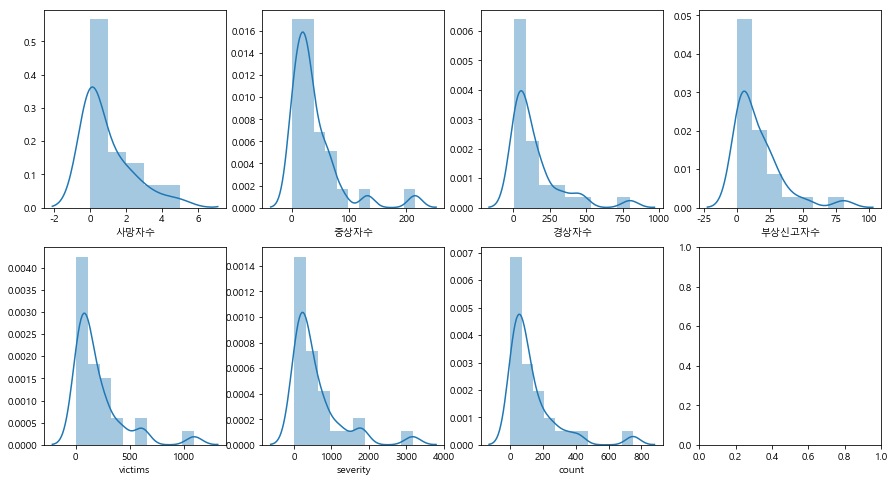

In [46]:
cols = accident.columns[1:]

fig, axs = plt.subplots(ncols=4, nrows = 2, figsize = (15,8))
for i in range(len(cols)) :
    sns.distplot(accident[cols[i]].values, ax = axs[i//4,i%4])
    axs[i//4,i%4].set_xlabel(cols[i])

In [61]:
accident['count'].quantile([0,0.1,0.2,0.25,0.5,0.75,0.8,0.9,1])

0.00      1.00
0.10     10.20
0.20     30.80
0.25     40.00
0.50     82.00
0.75    149.75
0.80    190.20
0.90    286.70
1.00    749.00
Name: count, dtype: float64

# FE

In [7]:
train['train'] = 1
test['train'] = 0
df = pd.concat([train, test])
df['logy'] = np.log1p(df['y'])
df.shape

(1489618, 44)

In [8]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["days"] = lb_make.fit_transform(df["days"])
df["direction"] = lb_make.fit_transform(df["direction"])
df["road_type"] = lb_make.fit_transform(df["road_type"])
df["urban_suburb"] = lb_make.fit_transform(df["urban_suburb"])
df["district"] = lb_make.fit_transform(df["district"])
df["time"] = lb_make.fit_transform(df["time"])

In [9]:
def rain_level(rain) :
    if rain >= 30 :
        return 3
    else :
        if rain >=15 :
            return 2
        else :
            if rain >=3 :
                return 1
            else : return 0

def dust_PM2_level(dust) :
    if dust >= 76 :
        return 3
    else :
        if dust >=36 :
            return 2
        else :
            if dust >=16 :
                return 1
            else : return 0      

def dust_PM10_level(dust) :
    if dust >= 151 :
        return 3
    else :
        if dust >=81 :
            return 2
        else :
            if dust >=31 :
                return 1
            else : return 0

def wind_level(wind) :
    if wind >= 14 :
        return 3
    else :
        if wind >=9 :
            return 2
        else :
            if wind >=4 :
                return 1
            else : return 0

def O3_level(O3) :
    if O3 >= 0.151 :
        return 3
    else :
        if O3 >=0.091 :
            return 2
        else :
            if O3 >=0.031 :
                return 1
            else : return 0
            
df['dust_PM10_level'] = df['PM10'].apply(lambda x : dust_PM10_level(x))
df['dust_PM2_level'] = df['PM2.5'].apply(lambda x : dust_PM2_level(x))
df['rain_level'] = df['rain'].apply(lambda x : rain_level(x))       
df['wind_level'] = df['wind'].apply(lambda x : wind_level(x))            
df['O3_level'] = df['O3'].apply(lambda x : O3_level(x))

In [10]:
bins = [-40,-10,10,20,30,50]
bins_names = [0,1,2,3,4] # 구간별 이름
df['temp_level'] = pd.cut(df['temperature'], bins, labels=bins_names)

In [11]:
df = df.drop(['date','road_name','link_id','start_point','end_point'],axis = 1)

In [12]:
train = df[df.train == 1]
test = df[df.train == 0]

print('train shape : ', train.shape)
print('test shape : ', test.shape)

train shape :  (1042732, 45)
test shape :  (446886, 45)


# original data baseline model

In [130]:
base_cols = ['days', 'direction', 'road_length', 'road_num', 'road_type',
       'urban_suburb', 'district', 'holiday', 'special', 'vacation', 'time',
       'inter_num', 'd1', 'd2', 'd3', 'd4', 'victims', 'severity',
       'accident_count', 'temperature', 'wind', 'rain', 'snow', 'cctv', 'kids',
       'speed_limit', 'entrance', 'signal', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM2.5', 'month', 'weekend']

X_base_train = train[base_cols]
y_base_train = train['y']
y_log_base_train = train['logy']

X_base_test = test[base_cols]
y_base_test = test['y']
y_log_base_test = test['logy']

In [13]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred) : 
    return np.sqrt(mean_squared_error(y_true, y_pred))

## linear regression

In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=333)

In [160]:
def model_cv_test(model, train_X, train_y, test_X, test_y, is_log) :

    train_rmse = []
    valid_rmse = []
    
    print('##### {} #####'.format(model.__class__.__name__))
        
    for i, (train_idx, val_idx) in enumerate(kf.split(train_X)):
        X_train, X_val = train_X.iloc[train_idx, :], train_X.iloc[val_idx, :]
        y_train, y_val = train_y[train_idx], train_y[val_idx]

        model.fit(X_train, y_train)
        
        if is_log :
            y_train = np.expm1(y_train)
            y_val = np.expm1(y_val)
            pred_train = np.expm1(model.predict(X_train))
            pred_valid = np.expm1(model.predict(X_val))
        else :
            pred_train = model.predict(X_train)
            pred_valid = model.predict(X_val)

        print('{0} fold train rmse : {1:.3f} valid rmse : {2:.3f}'.format(i, rmse(y_train, pred_train), rmse(y_val, pred_valid)))
        
        train_rmse.append(rmse(y_train, pred_train))
        valid_rmse.append(rmse(y_val, pred_valid))

    print('\n')    
    print('mean train rmse : {0:.3f} mean valid rmse : {1:.3f}'.format(np.mean(train_rmse), np.mean(valid_rmse)))

    
    model.fit(train_X, train_y)
    
    if is_log :
        test_y = np.expm1(test_y)
        pred_test = np.expm1(model.predict(test_X))
    else :
        pred_test = model.predict(test_X)
    
    print('test rmse {0:.3f} '.format(rmse(test_y, pred_test)))

In [161]:
#log transformation
model_cv_test(lr, X_base_train, y_log_base_train, X_base_test, y_log_base_test, True)

##### LinearRegression #####
0 fold train rmse : 10.590 valid rmse : 10.631
1 fold train rmse : 10.591 valid rmse : 10.628
2 fold train rmse : 10.609 valid rmse : 10.546
3 fold train rmse : 10.596 valid rmse : 10.600
4 fold train rmse : 10.597 valid rmse : 10.578


mean train rmse : 10.596 mean valid rmse : 10.597
test rmse 10.602 


In [162]:
model_cv_test(lr, X_base_train, y_base_train, X_base_test, y_base_test, False)

##### LinearRegression #####
0 fold train rmse : 10.323 valid rmse : 10.358
1 fold train rmse : 10.325 valid rmse : 10.351
2 fold train rmse : 10.342 valid rmse : 10.280
3 fold train rmse : 10.328 valid rmse : 10.339
4 fold train rmse : 10.331 valid rmse : 10.324


mean train rmse : 10.330 mean valid rmse : 10.330
test rmse 10.339 


## random forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs = -1)

In [120]:
model_cv_test(rf, X_base_train, y_base_train, X_base_test, y_base_test, False)

##### RandomForestRegressor #####


C:\Users\wjssm\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0 fold train rmse : 1.475 valid rmse : 3.460
1 fold train rmse : 1.467 valid rmse : 3.450
2 fold train rmse : 1.470 valid rmse : 3.455
3 fold train rmse : 1.467 valid rmse : 3.474
4 fold train rmse : 1.475 valid rmse : 3.438


mean train rmse : 1.471 mean valid rmse : 3.455
test rmse {0:.3f}:  3.345235238546796


In [164]:
#log transformation
model_cv_test(rf, X_base_train, y_log_base_train, X_base_test, y_log_base_test, True)

##### RandomForestRegressor #####
0 fold train rmse : 1.522 valid rmse : 3.506
1 fold train rmse : 1.528 valid rmse : 3.490
2 fold train rmse : 1.533 valid rmse : 3.515
3 fold train rmse : 1.525 valid rmse : 3.531
4 fold train rmse : 1.530 valid rmse : 3.502


mean train rmse : 1.528 mean valid rmse : 3.509
test rmse 3.388 


In [124]:
rf.fit(X_base_train,  y_base_train)
rf_pred = rf.predict(X_base_test)

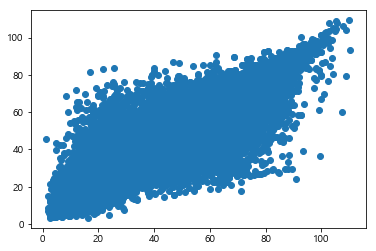

In [127]:
plt.scatter(y_base_test, rf_pred)

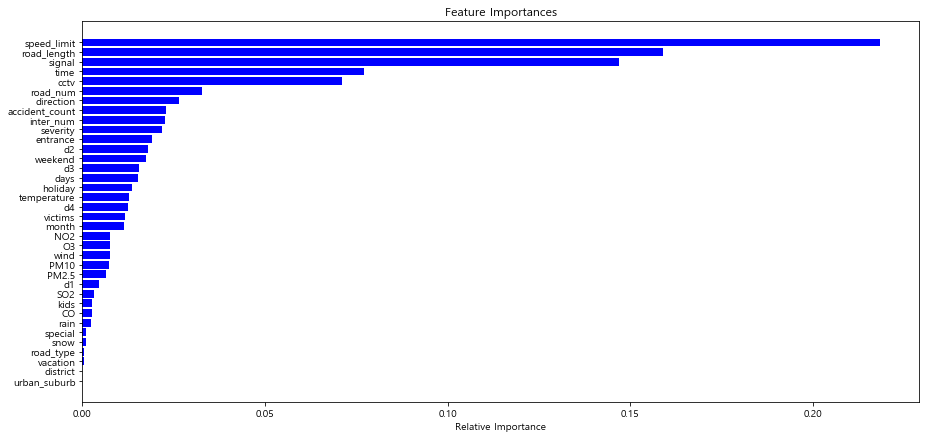

In [126]:
plt.figure(figsize = (15,7))
features = X_base_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

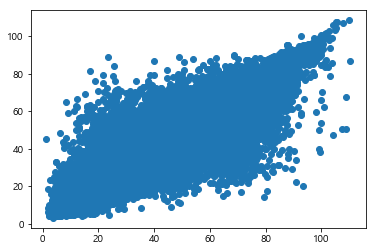

In [165]:
rf.fit(X_base_train,  y_log_base_train)
rf_pred = np.expm1(rf.predict(X_base_test))

plt.scatter(y_base_test, rf_pred)

# add weather features

In [14]:
X_train = train.drop(['y','logy'], axis = 1)
y_train = train['y']
y_log_train = train['logy']

X_test = test.drop(['y','logy'], axis = 1)
y_test = test['y']
y_log_test = test['logy']

In [172]:
model_cv_test(rf, X_train, y_train, X_test, y_test, False)

##### RandomForestRegressor #####
0 fold train rmse : 1.477 valid rmse : 3.451
1 fold train rmse : 1.477 valid rmse : 3.455
2 fold train rmse : 1.472 valid rmse : 3.465
3 fold train rmse : 1.470 valid rmse : 3.485
4 fold train rmse : 1.479 valid rmse : 3.442


mean train rmse : 1.475 mean valid rmse : 3.459
test rmse 3.339 


In [17]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

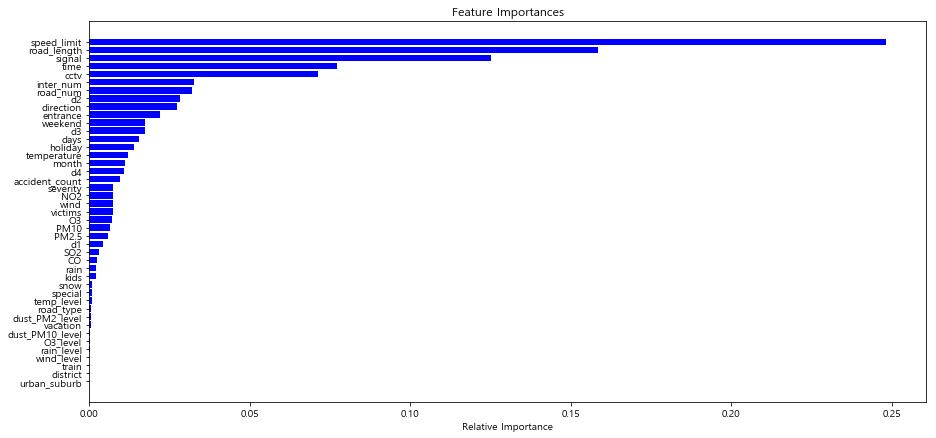

In [174]:
plt.figure(figsize = (15,7))
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [175]:
#log transformation
model_cv_test(rf, X_train, y_log_train, X_test, y_log_test, True)

##### RandomForestRegressor #####
0 fold train rmse : 1.537 valid rmse : 3.512
1 fold train rmse : 1.531 valid rmse : 3.485
2 fold train rmse : 1.531 valid rmse : 3.502
3 fold train rmse : 1.524 valid rmse : 3.529
4 fold train rmse : 1.527 valid rmse : 3.501


mean train rmse : 1.530 mean valid rmse : 3.506
test rmse 3.402 


# PDP

In [29]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

In [ ]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [30]:
cols = ['CO','rain']

In [31]:
fig, axs = plot_partial_dependence(rf, X_train[cols], cols, feature_names=cols, n_predictors=2, figsize=(9,5))

ValueError: gbrt has to be an instance of BaseGradientBoosting

# EDA

In [19]:
df.columns

Index(['days', 'direction', 'road_length', 'road_num', 'road_type',
       'urban_suburb', 'district', 'holiday', 'special', 'vacation', 'time',
       'inter_num', 'd1', 'd2', 'd3', 'd4', 'victims', 'severity',
       'accident_count', 'temperature', 'wind', 'rain', 'snow', 'cctv', 'kids',
       'speed_limit', 'entrance', 'signal', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM2.5', 'month', 'weekend', 'y', 'train', 'logy', 'dust_PM10_level',
       'dust_PM2_level', 'rain_level', 'wind_level', 'O3_level', 'temp_level'],
      dtype='object')

In [20]:
df.head()

,days,direction,road_length,road_num,road_type,urban_suburb,district,holiday,special,vacation,time,inter_num,d1,d2,d3,d4,victims,severity,accident_count,temperature,wind,rain,snow,cctv,kids,speed_limit,entrance,signal,SO2,CO,O3,NO2,PM10,PM2.5,month,weekend,y,train,logy,dust_PM10_level,dust_PM2_level,rain_level,wind_level,O3_level,temp_level
0,3,1,484,4.0,3,0,0,0,0,0,12,14.0,1,63,307,34,405,1156,246,10.5,1.1,0.0,0.0,1.0,0.0,60.0,76.0,68.0,0.007,0.6,0.002,0.055,36.0,20.0,11,0,28.16,1,3.372798,1,1,0,0,0,2
1,5,0,851,4.0,3,0,0,0,0,0,11,28.0,3,132,434,52,621,1786,419,31.8,1.9,0.0,0.0,0.0,0.0,50.0,64.0,115.0,0.006,0.3,0.020,0.027,29.0,21.0,7,1,36.57,1,3.626206,0,1,0,0,0,4
2,3,1,652,7.0,3,0,0,0,0,0,12,12.0,2,39,177,27,245,699,140,22.4,1.1,0.0,0.0,6.0,0.0,60.0,35.0,44.0,0.005,0.5,0.019,0.037,23.0,11.0,9,0,26.26,1,3.305420,0,0,0,0,0,3
3,5,1,291,2.0,3,0,0,0,0,0,2,7.0,0,43,158,21,222,624,139,27.7,1.9,0.0,0.0,0.0,0.0,60.0,61.0,42.0,0.005,0.5,0.030,0.026,50.0,38.0,6,1,18.26,1,2.958030,1,2,0,0,0,3
4,0,0,798,4.0,3,0,0,0,0,0,7,45.0,4,215,799,81,1099,3171,749,11.8,2.0,0.0,0.0,4.0,0.0,50.0,301.0,91.0,0.006,0.6,0.023,0.029,40.0,28.0,11,0,18.51,1,2.970927,1,1,0,0,0,2


In [25]:
#강수별, 시간대별 평균 속도
rain_time = pd.DataFrame(df.groupby(['rain_level','time'])['y'].mean())
rain_time = rain_time.unstack()
rain_time = rain_time.iloc[:2,]
rain_time

y                                                         \
time               0          1          2          3          4          5    
rain_level                                                                     
0           28.050414  27.028479  26.700734  27.231871  26.665026  25.396308   
1           25.518062  26.416831  25.094026  25.269478  24.532984  24.374485   

                                                                              \
time               6          7          8          9          10         11   
rain_level                                                                     
0           24.688923  24.087525  23.115905  22.544989  24.154486  27.711775   
1           20.344184  22.867149  21.556089  20.814891  22.005386  24.884090   

                                  
time               12         13  
rain_level                        
0           29.240351  29.847486  
1           27.591841  28.051700

[]

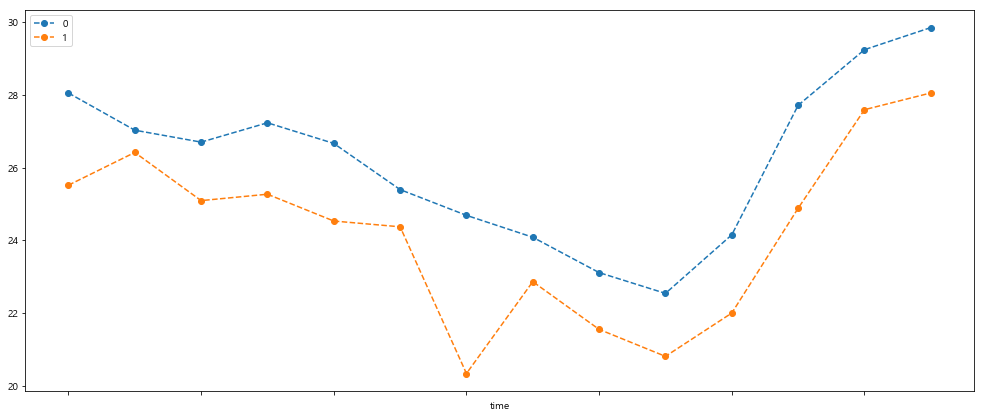

In [26]:
plt.figure(figsize=(17,7))
rain_time.loc[0, :].plot(label = '0',ls="--",marker="o")
rain_time.loc[1, :].plot(label = '1',ls="--",marker="o")


plt.xlabel('time')
plt.legend()
plt.plot()

In [27]:
#강수별, 시간대별 평균 속도
wind_time = pd.DataFrame(df.groupby(['wind_level','time'])['y'].mean())
wind_time = wind_time.unstack()

wind_time

y                                                         \
time               0          1          2          3          4          5    
wind_level                                                                     
0           27.964138  27.015996  26.683640  27.188384  26.629172  25.403041   
1           30.920937  25.571525  26.318135  27.011664  26.864978  24.944248   

                                                                              \
time               6          7          8          9          10         11   
wind_level                                                                     
0           24.663493  24.100831  23.098169  22.524629  24.135203  27.655673   
1           24.738921  21.980170  21.750034  21.720476  23.600583  25.651497   

                                  
time               12         13  
wind_level                        
0           29.211857  29.828957  
1           28.265200  28.694456

[]

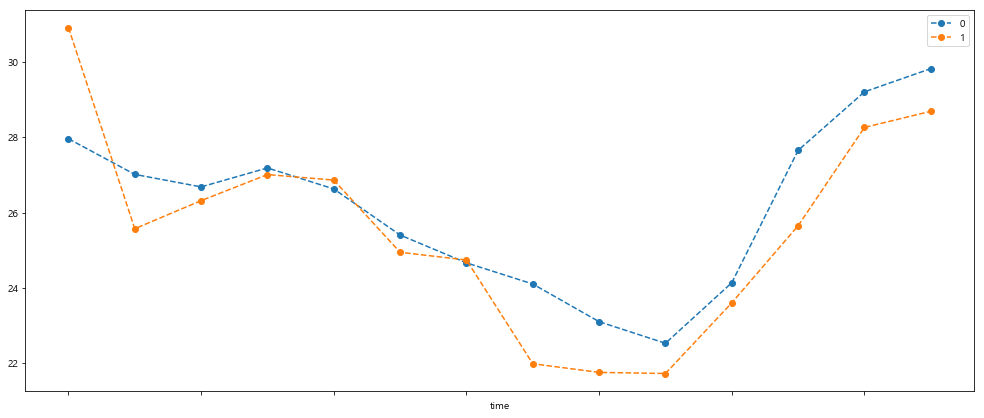

In [28]:
plt.figure(figsize=(17,7))
wind_time.loc[0, :].plot(label = '0',ls="--",marker="o")
wind_time.loc[1, :].plot(label = '1',ls="--",marker="o")


plt.xlabel('time')
plt.legend()
plt.plot()